In [164]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import math

In [165]:
iris = load_iris()
iris_X, iris_y = iris.data, iris.target
n,d = iris_X.shape
print(iris.target_names)
print(iris.feature_names,iris_X.shape)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] (150, 4)


In [166]:
label_dict = {i: k for i, k in enumerate(iris.target_names)}
feature_dict = {i:label for i,label in zip(
                range(4),
                  ('sepal length in cm',
                  'sepal width in cm',
                  'petal length in cm',
                  'petal width in cm', ))}
print(label_dict)
print(feature_dict)

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}
{0: 'sepal length in cm', 1: 'sepal width in cm', 2: 'petal length in cm', 3: 'petal width in cm'}


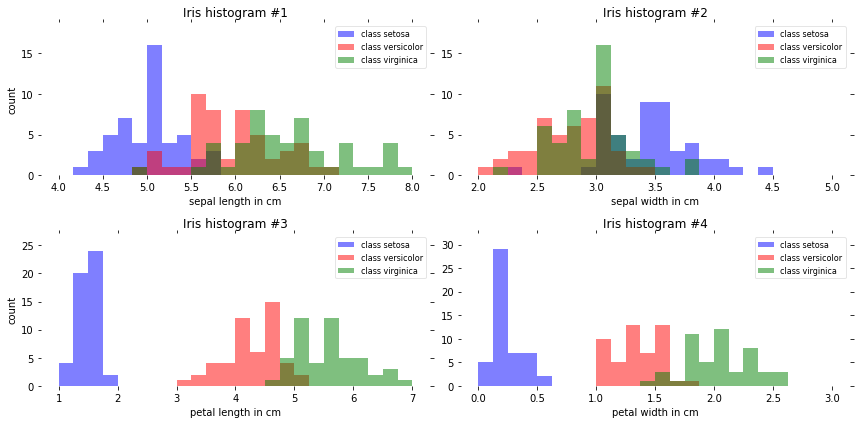

In [167]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

for ax,cnt in zip(axes.ravel(), range(4)):  
    # set bin sizes
    min_b = math.floor(np.min(iris_X[:,cnt]))
    max_b = math.ceil(np.max(iris_X[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)

    # plottling the histograms
    for lab,col in zip(range(0,3), ('blue', 'red', 'green')):
        ax.hist(iris_X[iris_y==lab, cnt],
                   color=col,
                   label='class %s' %label_dict[lab],
                   bins=bins,
                   alpha=0.5,)
    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel(feature_dict[cnt])
    ax.set_title('Iris histogram #%s' %str(cnt+1))

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

axes[0][0].set_ylabel('count')
axes[1][0].set_ylabel('count')

fig.tight_layout()       

plt.show()

In [168]:
# Step 1:
mean_vectors = []  # mean vector of each class
for cl in [0, 1, 2]:
  class_mean_vector = np.mean(iris_X[iris_y==cl], axis=0)
  mean_vectors.append(class_mean_vector)
  print(label_dict[cl], class_mean_vector)

setosa [5.006 3.428 1.462 0.246]
versicolor [5.936 2.77  4.26  1.326]
virginica [6.588 2.974 5.552 2.026]


In [169]:
# Step 2:
S_W = np.zeros((d,d))
for cl,mv in zip([0, 1, 2], mean_vectors):   # each class 
  tmp = iris_X[iris_y == cl] - mv
  class_scatter_mat = np.dot(tmp.T,tmp)# scatter matrix
  S_W += class_scatter_mat

print("S_Within Classes: \n",S_W,"\n")

overall_mean = np.mean(iris_X, axis=0)  # mean vector of each feature in whole dataset 
print("Overal mean of each feature: ",overall_mean,"\n")

S_B = np.zeros((d,d)) # 
for i,mean_vec in enumerate(mean_vectors):
  n_prime = iris_X[iris_y==i,:].shape[0]  # number of samples corresponding to class ith
  tmp = np.transpose(mean_vec - overall_mean).reshape(d,1)   # size d*1
  S_B += n_prime * np.dot(tmp,tmp.T)

print("S_Between Classes: \n",S_B)

S_Within Classes: 
 [[38.9562 13.63   24.6246  5.645 ]
 [13.63   16.962   8.1208  4.8084]
 [24.6246  8.1208 27.2226  6.2718]
 [ 5.645   4.8084  6.2718  6.1566]] 

Overal mean of each feature:  [5.84333333 3.05733333 3.758      1.19933333] 

S_Between Classes: 
 [[ 63.21213333 -19.95266667 165.2484      71.27933333]
 [-19.95266667  11.34493333 -57.2396     -22.93266667]
 [165.2484     -57.2396     437.1028     186.774     ]
 [ 71.27933333 -22.93266667 186.774       80.41333333]]


In [170]:
# Step 3:
matrixA = np.dot(np.linalg.inv(S_W), S_B)    # inverse S_W * S_B
eig_vals, eig_vecs = np.linalg.eig(matrixA) # lamda 1> lambda 2 > .. lambda n
eig_vecs = eig_vecs.transpose() 

for i in range(len(eig_vals)):
  print('eigenvalue  ',i+1,': ',eig_vals[i])
  print('eigenvector ',i+1,': ',eig_vecs[i],'\n')

eigenvalue   1 :  32.191929198278025
eigenvector  1 :  [-0.20874182 -0.38620369  0.55401172  0.7073504 ] 

eigenvalue   2 :  0.28539104262306975
eigenvector  2 :  [-0.00653196 -0.58661055  0.25256154 -0.76945309] 

eigenvalue   3 :  -1.6067824368826592e-15
eigenvector  3 :  [ 0.87924206 -0.32816889 -0.31374947 -0.1442215 ] 

eigenvalue   4 :  -9.195837483528325e-15
eigenvector  4 :  [ 0.15169622  0.28172319  0.35490222 -0.87844448] 



[ 9.91212605e+01  8.78739503e-01 -4.94739845e-15 -2.83146436e-14]


Text(0, 0.5, '% of Total Variance  <= k')

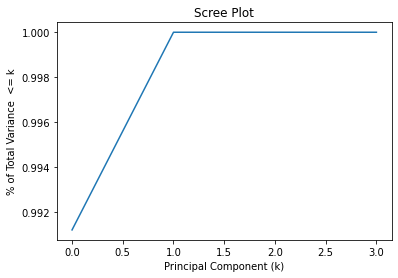

In [171]:
# Step 4:
ratio = eig_vals/eig_vals.sum()
print((ratio*100))
# Scree Plot
plt.plot(np.cumsum(ratio)) # cumulative sum
plt.title('Scree Plot')
plt.xlabel('Principal Component (k)')
plt.ylabel('% of Total Variance  <= k')

In [172]:
# Step 5: 
k=2   # keep k eigenvectors
k_eigen_vector = eig_vecs[:k]
k_eigen_vector

array([[-0.20874182, -0.38620369,  0.55401172,  0.7073504 ],
       [-0.00653196, -0.58661055,  0.25256154, -0.76945309]])

In [173]:
# Step 6: Transformation
new_X = np.dot(iris_X, k_eigen_vector.T)
print("first 5 rows of new dataset after applying LDA: " ,new_X[:5,] )

first 5 rows of new dataset after applying LDA:  [[-1.49920971 -1.88675441]
 [-1.2643595  -1.59214275]
 [-1.35525305 -1.73341462]
 [-1.18495616 -1.62358806]
 [-1.5169559  -1.94476227]]


In [182]:
### using sklearn ### 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=k) # k= 2
lda.fit(iris_X,iris_y)
print(lda.explained_variance_ratio_*100)
print(lda.scalings_)

[99.1212605  0.8787395]
[[ 0.82937764  0.02410215]
 [ 1.53447307  2.16452123]
 [-2.20121166 -0.93192121]
 [-2.81046031  2.83918785]]
